In [193]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
import time
import ssl
import math

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# OpenML
import openml

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression, Lasso, BayesianRidge, LassoLarsIC
from sklearn.svm import SVR, SVC
from mlxtend.regressor import StackingCVRegressor
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Stats
from scipy import stats
from scipy.stats import skew, norm, boxcox_normmax, randint, uniform
from scipy.special import boxcox1p

# Misc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, train_test_split, learning_curve, validation_curve
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_curve, log_loss, classification_report, fbeta_score,roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, scale, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import optuna

# Feature Importance
import eli5
from eli5.sklearn import PermutationImportance


In [117]:
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv('https://www.openml.org/data/get_csv/31/dataset_31_credit-g.csv')

In [118]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [119]:
len(df)

1000

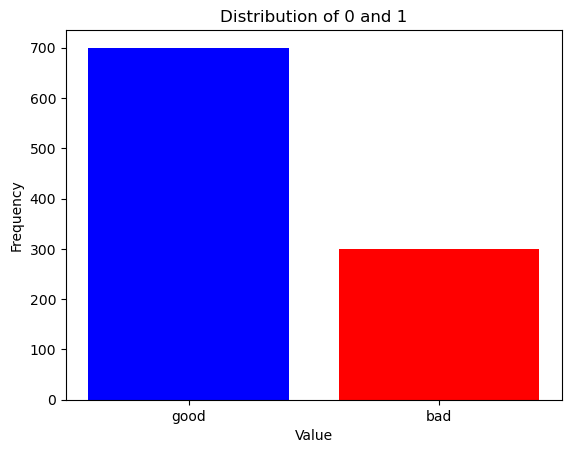

In [120]:
value_count =df['class'].value_counts()
color_dict = {'good':'b', 'bad':'r'}
colors = [color_dict[x] for x in value_count.index]
plt.bar(value_count.index, value_count.values,color= colors)
plt.title("Distribution of 0 and 1")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xticks(value_count.index)
plt.show()


Text(0, 0.5, 'Population')

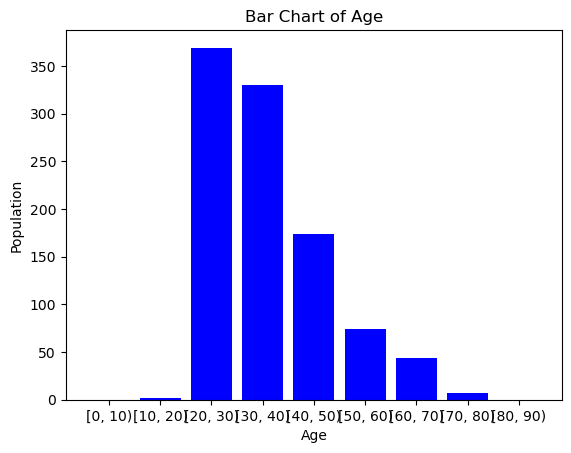

In [121]:
# 年齡的直方圖
x = df['age']
age_groups = pd.cut(x, bins=range(0, 100, 10), right=False)
age_counts = age_groups.value_counts().sort_index()
plt.bar(age_counts.index.astype(str), age_counts.values, color='blue')
plt.title('Bar Chart of Age')
plt.xlabel('Age')
plt.ylabel('Population')

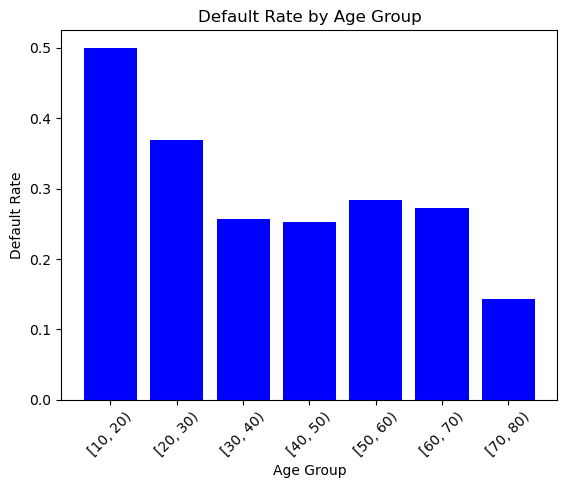

In [122]:
# 1. Create a new column for age groups
df['class_numeric'] = df['class'].map({'good': 0, 'bad': 1})
df['age_group'] = pd.cut(df['age'], bins=range(0, 100, 10), right=False)
# 2. Calculate the default rate for each age group
default_rate = df.groupby('age_group')['class_numeric'].mean()

# 3. Plot the default rate for each age group
plt.bar(default_rate.index.astype(str), default_rate.values, color='blue')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()


可以發現20-30歲間的違約率是最高的，10-20歲的年齡可忽略不計

# 貸款目的類別(purpose) :相對比例圓餅圖

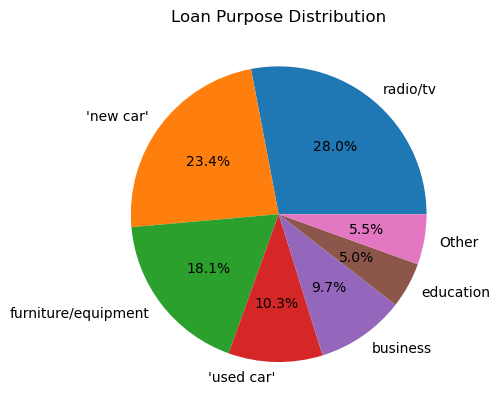

In [123]:
# Assuming df is your dataframe
purpose_freq = df['purpose'].value_counts()
total = len(df)
purpose_percentage = (purpose_freq / total) * 100

# Identify purposes less than 5% and combine them as 'Other'
mask = purpose_percentage < 5
other_count = purpose_freq[mask].sum()
purpose_freq = purpose_freq[~mask]
purpose_freq['Other'] = other_count

plt.pie(purpose_freq, labels=purpose_freq.index, autopct='%1.1f%%')
plt.title('Loan Purpose Distribution')
plt.show()


Text(0, 0.5, 'Duration')

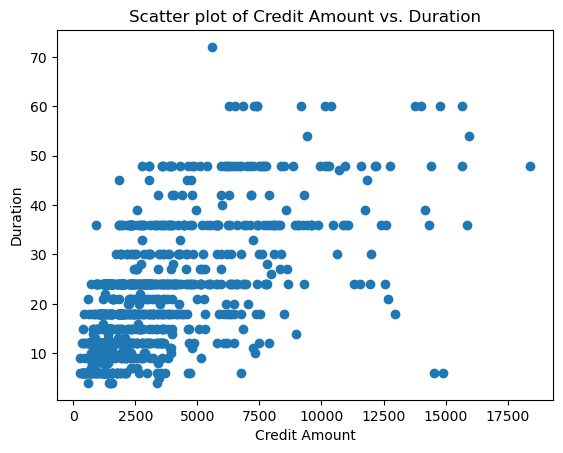

In [124]:
# credit_amoint和duration的散點圖
x = df['credit_amount']
y = df['duration']
plt.scatter(x, y)
plt.title('Scatter plot of Credit Amount vs. Duration')
plt.xlabel('Credit Amount')
plt.ylabel('Duration')

# 信用額度(credit_amount) 直方圖

Text(0.5, 1.0, 'Histogram of Credit Amount')

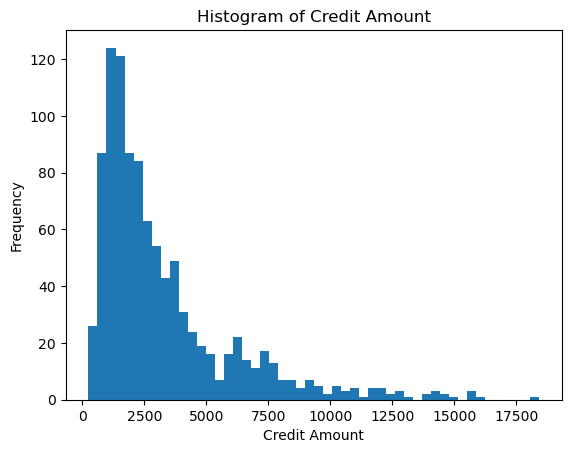

In [125]:
plt.hist(df['credit_amount'], bins=50)
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Credit Amount')

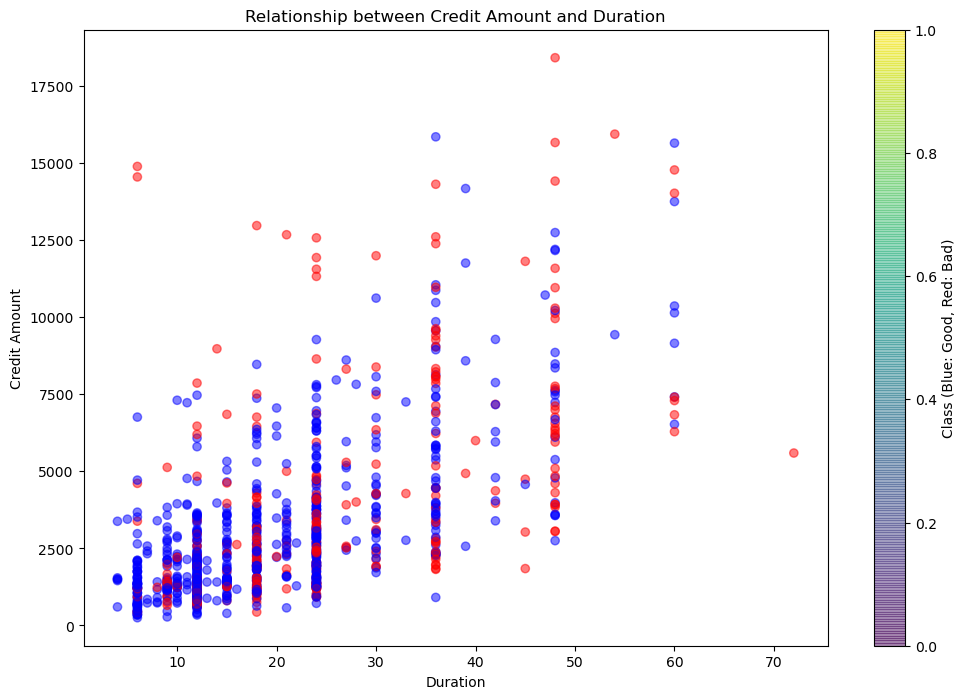

In [126]:
# Scatter plot of credit_amount vs duration, colored by class
plt.figure(figsize=(12, 8))
colors = df['class_numeric'].map({0: 'blue', 1: 'red'})
plt.scatter(df['duration'], df['credit_amount'], c=colors, alpha=0.5)
plt.title('Relationship between Credit Amount and Duration')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.colorbar(label='Class (Blue: Good, Red: Bad)')
plt.show()

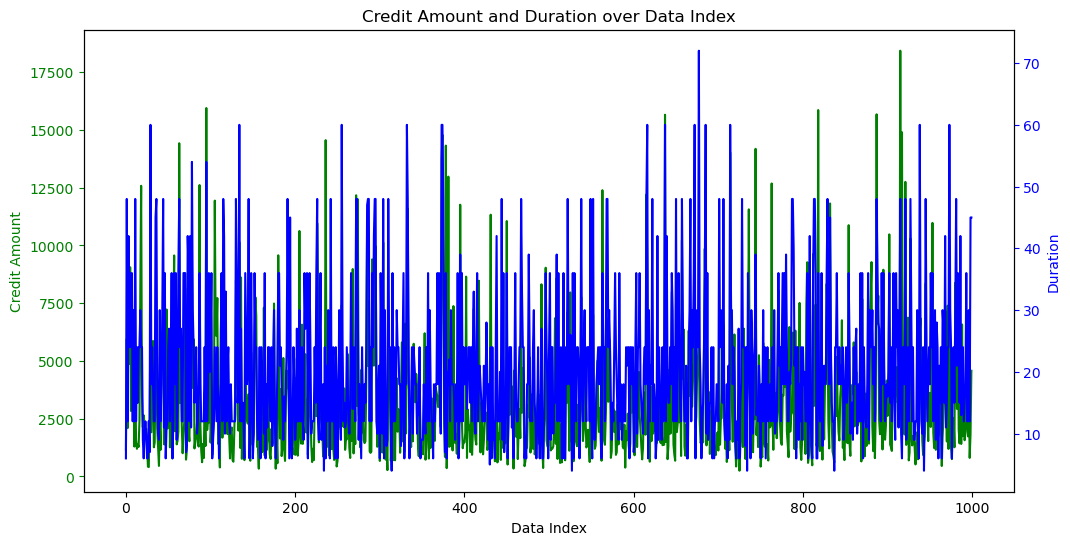

In [127]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Twin the axes for two different y-axes
ax2 = ax1.twinx()

# Plot credit_amount on ax1
ax1.plot(df.index, df['credit_amount'], 'g-')
ax1.set_xlabel('Data Index')
ax1.set_ylabel('Credit Amount', color='g')
ax1.tick_params('y', colors='g')

# Plot duration on ax2
ax2.plot(df.index, df['duration'], 'b-')
ax2.set_ylabel('Duration', color='b')
ax2.tick_params('y', colors='b')

# Title
plt.title('Credit Amount and Duration over Data Index')

plt.show()

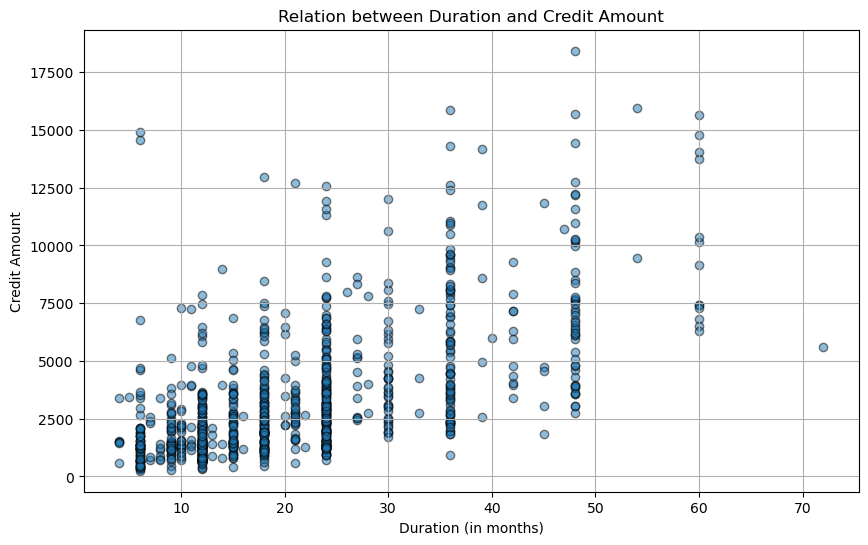

In [128]:
# Plotting scatter plot for credit_amount and duration
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['credit_amount'], alpha=0.5, edgecolor='k')
plt.title('Relation between Duration and Credit Amount')
plt.xlabel('Duration (in months)')
plt.ylabel('Credit Amount')
plt.grid(True)
plt.show()


# 年龄与信用额度 折线图

Text(0, 0.5, 'Mean Credit Amount')

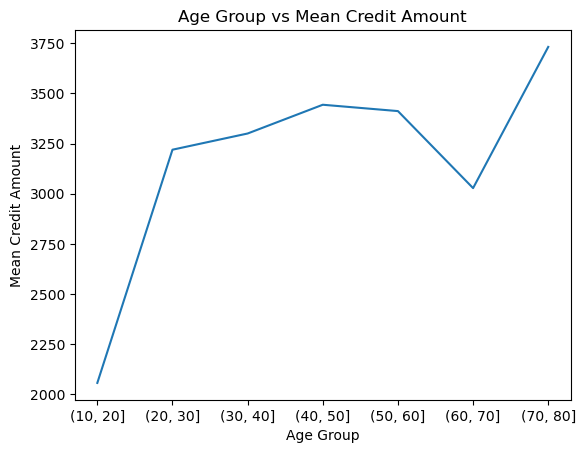

In [129]:
df['age_group'] = pd.cut(df['age'], bins=range(0, 101, 10))
credit_amount_by_age_group = df.groupby('age_group')['credit_amount'].mean()
plt.plot(credit_amount_by_age_group.index.astype(str), credit_amount_by_age_group.values)
plt.title('Age Group vs Mean Credit Amount')
plt.xlabel('Age Group')
plt.ylabel('Mean Credit Amount')

# 绘制相关系数热力图

/var/folders/py/22pm4l4d13l6mwknzcj_nf0c0000gn/T/ipykernel_86728/3969294940.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


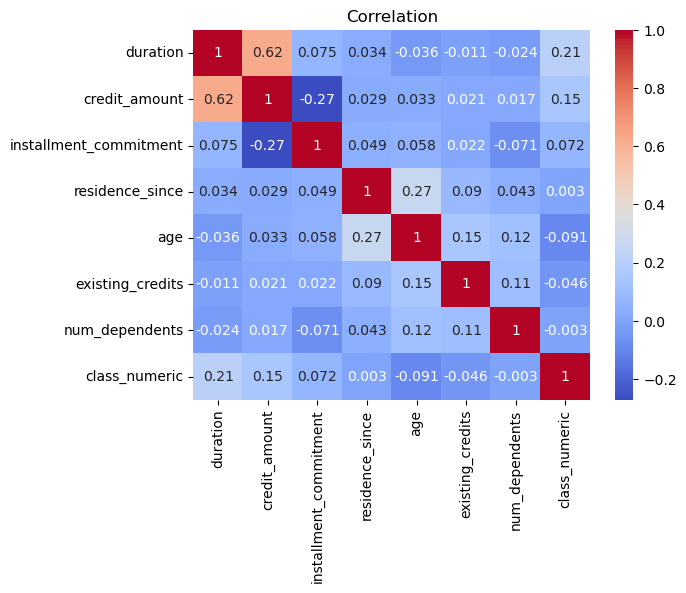

In [130]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation')
plt.show()


# 绘制每个特征的直方图

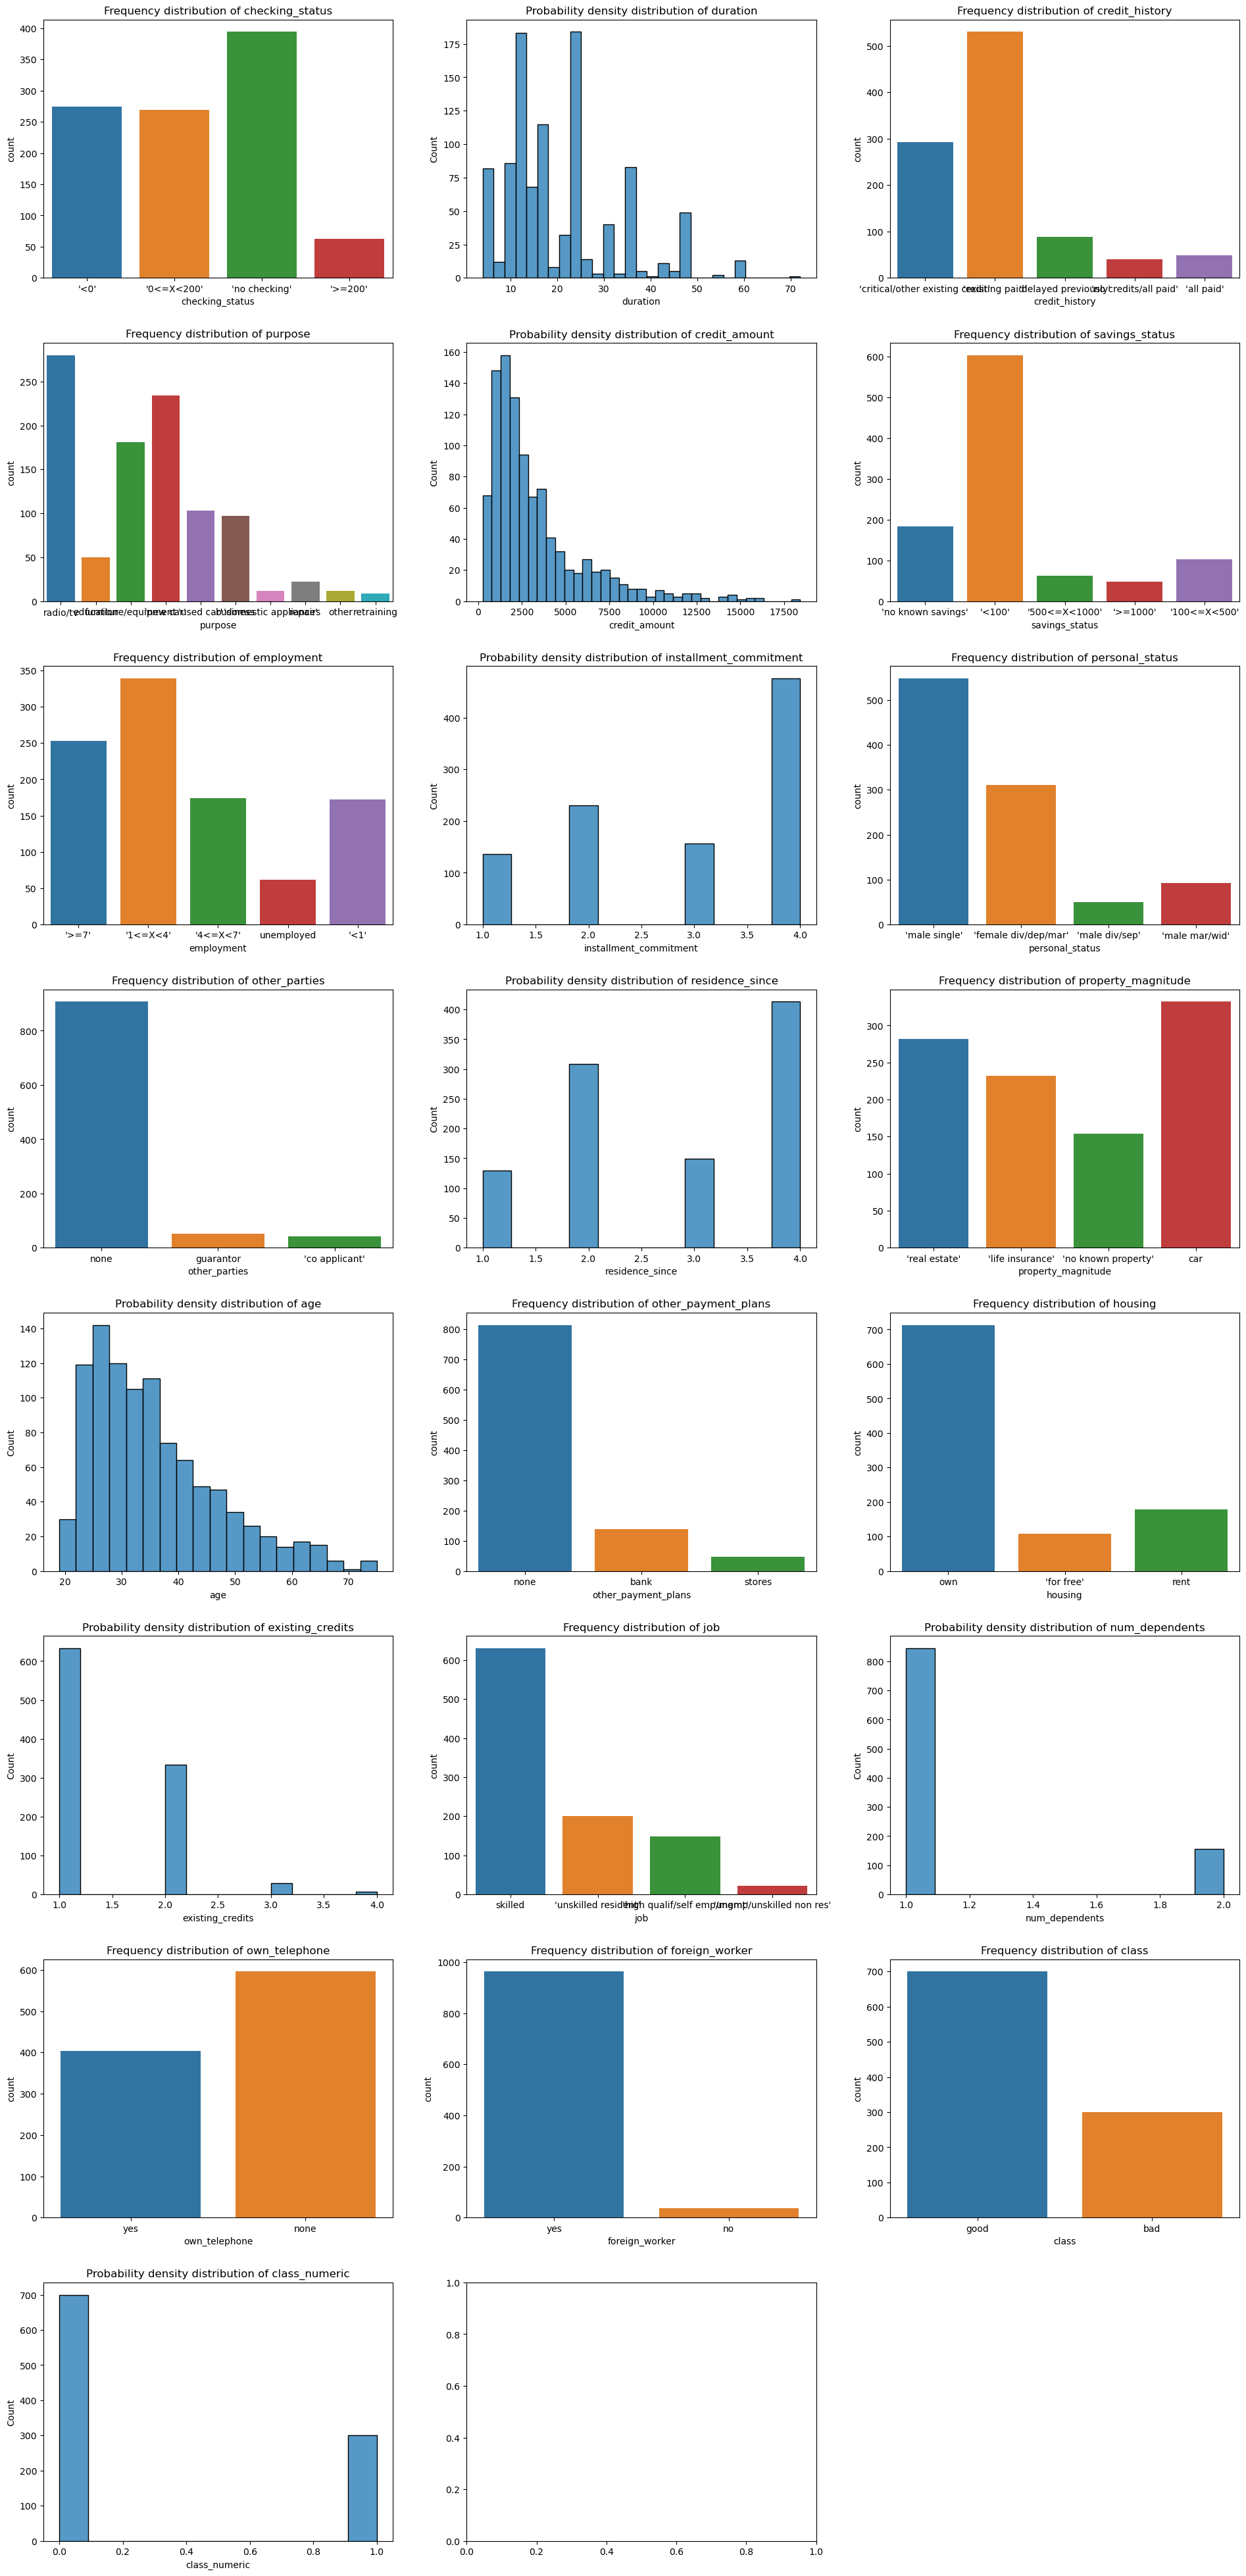

In [131]:
import math

# 計算子圖的行數和列數
n = len(df.columns)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows*5))
fig.tight_layout(pad=5.0)  # Add spacing between subplots for clarity

for i, col in enumerate(df.columns):
    ax = axes[i//ncols, i%ncols]
    if df[col].dtype == 'object':
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f'Frequency distribution of {col}')
    elif df[col].dtype in ['int64', 'float64']:  # only plot for numeric data
        sns.histplot(df[col], ax=ax)  # Use histplot instead of deprecated distplot
        ax.set_title(f'Probability density distribution of {col}')


# 如果特徵的數量不是子圖總數的倍數，隱藏多餘的子圖
for j in range(i+1, nrows*ncols):
    fig.delaxes(axes.flatten()[j])

plt.show()


In [132]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [133]:
y = df['class']
df.drop('class', axis=1, inplace= True)

In [134]:
df.drop(['class_numeric','age_group'], axis = 1, inplace=True)

In [135]:

cols = df.dtypes[(df.dtypes=='object')].index
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (1000, 20)


In [136]:
numeric_feats = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
credit_amount,1.946702
num_dependents,1.906579
existing_credits,1.270666
duration,1.092542
age,1.019208
own_telephone,0.391280
employment,0.223776
housing,0.070698
savings_status,0.062135
checking_status,0.004531


In [137]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 20 skewed numerical features to Box Cox transform


In [138]:
df.dtypes

checking_status           float64
duration                  float64
credit_history            float64
purpose                   float64
credit_amount             float64
savings_status            float64
employment                float64
installment_commitment    float64
personal_status           float64
other_parties             float64
residence_since           float64
property_magnitude        float64
age                       float64
other_payment_plans       float64
housing                   float64
existing_credits          float64
job                       float64
num_dependents            float64
own_telephone             float64
foreign_worker            float64
dtype: object

In [150]:

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0.730463,2.259674,0.730463,2.440268,12.570301,1.820334,1.540963,1.820334,1.540963,1.194318,1.820334,1.194318,5.887419,0.730463,0.730463,1.194318,1.540963,0.730463,0.730463,0.730463
1,0.000000,5.285266,1.540963,2.440268,17.886538,1.194318,0.000000,1.194318,0.000000,1.194318,1.194318,1.194318,4.003419,0.730463,0.730463,0.730463,1.540963,0.730463,0.000000,0.730463
2,1.540963,3.128239,0.730463,1.820334,14.329911,1.194318,0.730463,1.194318,1.540963,1.194318,1.540963,1.194318,5.321541,0.730463,0.730463,0.730463,1.194318,1.194318,0.000000,0.730463
3,0.730463,5.053371,1.540963,2.055642,18.943504,1.194318,0.730463,1.194318,1.540963,0.730463,1.820334,0.000000,5.172535,0.730463,0.000000,0.730463,1.540963,1.194318,0.000000,0.730463
4,0.730463,4.137711,1.194318,0.730463,17.159351,1.194318,0.000000,1.540963,1.540963,1.194318,1.820334,0.730463,5.460736,0.730463,0.000000,1.194318,1.540963,1.194318,0.000000,0.730463


In [148]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: class, dtype: int64

In [149]:
x.head()

0    1169
1    5951
2    2096
3    7882
4    4870
Name: credit_amount, dtype: int64

In [177]:
# 數據集切分
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# 邏輯回歸

Confusion Matrix:
 [[193  16]
 [ 72  19]]
ROC AUC Score: 0.5661180924338819
准确率： 0.7066666666666667
F1 Score: 0.30158730158730157


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


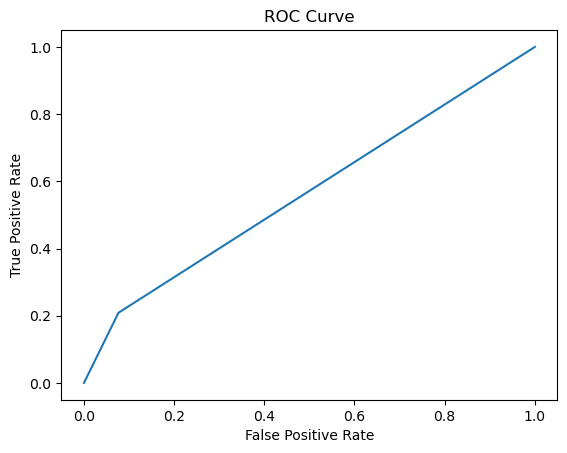

In [152]:

# 創建模型
logreg = LogisticRegression()

# 模型訓練
logreg.fit(X_train, y_train)

# 模型預測
y_pred = logreg.predict(X_test)

# 模型評估
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
# 在测试集上进行预测并计算准确率

accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)
from sklearn.metrics import classification_report,f1_score
print('F1 Score:', f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 隨機森林

In [153]:
def get_feature_importances(X, y):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    importances = model.feature_importances_
    feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)
    return feature_importances.round(3)



In [154]:
# 定义随机森林模型
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)
# 调用函数并输出结果
feature_importances = get_feature_importances(X_train, y_train)
print(feature_importances)

                   feature  importance
0            credit_amount       0.130
1                      age       0.114
2                 duration       0.102
3          checking_status       0.100
4                  purpose       0.067
5           credit_history       0.064
6               employment       0.051
7   installment_commitment       0.044
8           savings_status       0.042
9          residence_since       0.042
10      property_magnitude       0.038
11         personal_status       0.034
12                     job       0.031
13                 housing       0.030
14     other_payment_plans       0.029
15        existing_credits       0.024
16           own_telephone       0.022
17           other_parties       0.016
18          num_dependents       0.014
19          foreign_worker       0.005


# 畫出importance

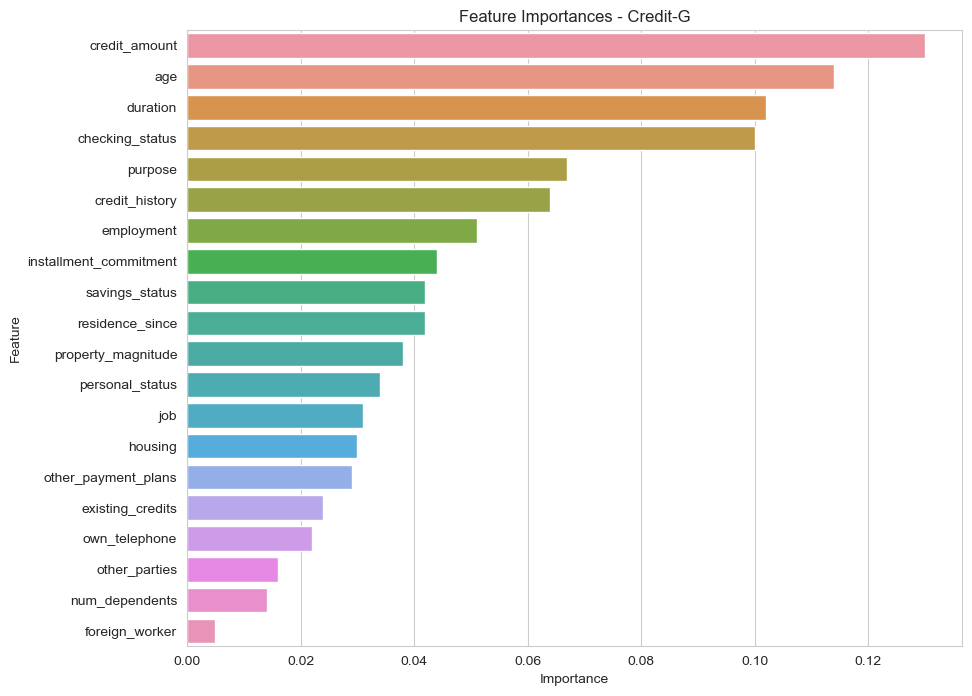

In [155]:
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances - Credit-G')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 训练随机森林模型并记录每一轮迭代的交叉熵损失值

In [157]:
train_losses, test_losses = [], []
n_iterations = 1000
for i in range(n_iterations):
    rf.fit(X_train, y_train)
    train_loss = neg_log_loss(y_train, rf.predict_proba(X_train)[:, 1])
    test_loss = neg_log_loss(y_test, rf.predict_proba(X_test)[:, 1])
    train_losses.append(train_loss)
    test_losses.append(test_loss)

/var/folders/py/22pm4l4d13l6mwknzcj_nf0c0000gn/T/ipykernel_86728/116965791.py:17: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))
/var/folders/py/22pm4l4d13l6mwknzcj_nf0c0000gn/T/ipykernel_86728/116965791.py:17: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))
/var/folders/py/22pm4l4d13l6mwknzcj_nf0c0000gn/T/ipykernel_86728/116965791.py:17: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))
/var/folders/py/22pm4l4d13l6mwknzcj_nf0c0000gn/T/ipykernel_86728/116965791.py:17: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))
/var/folders/py/22pm4l4d13l6mwknzcj_nf0c0000gn/T/ipykernel_86728/116965791.py:17: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true

# 繪製cross entropy曲線

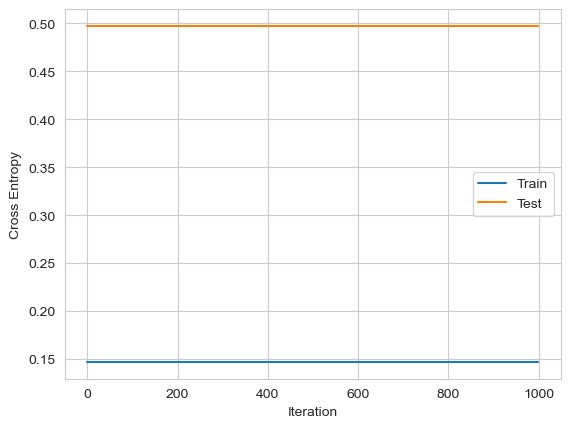

In [158]:
plt.plot(np.arange(n_iterations), train_losses, label='Train')
plt.plot(np.arange(n_iterations), test_losses, label='Test')
plt.xlabel('Iteration')
plt.ylabel('Cross Entropy')
plt.legend()
plt.show()

# Cross Entropy學習曲線

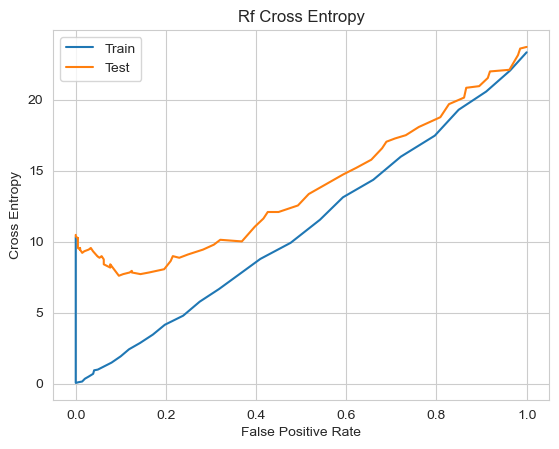

In [159]:
train_probs = rf.predict_proba(X_train)[:, 1]
test_probs = rf.predict_proba(X_test)[:, 1]
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs)
train_ce = [log_loss(y_train, train_probs > threshold) for threshold in train_thresholds]
test_ce = [log_loss(y_test, test_probs > threshold) for threshold in test_thresholds]


plt.plot(train_fpr, train_ce, label='Train')
plt.plot(test_fpr, test_ce, label='Test')
plt.title('Rf Cross Entropy')
plt.xlabel('False Positive Rate')
plt.ylabel('Cross Entropy')
plt.legend()
plt.show()


# 隨機森林參數優化

In [ ]:
param_dist = {"min_samples_split": randint(2, 20)}
rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight=None, max_depth=10, max_features=0.530450009647913)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# 印出最佳參數與最佳分數

In [ ]:
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

# 計算training和testing accuracy的平均值和標準差

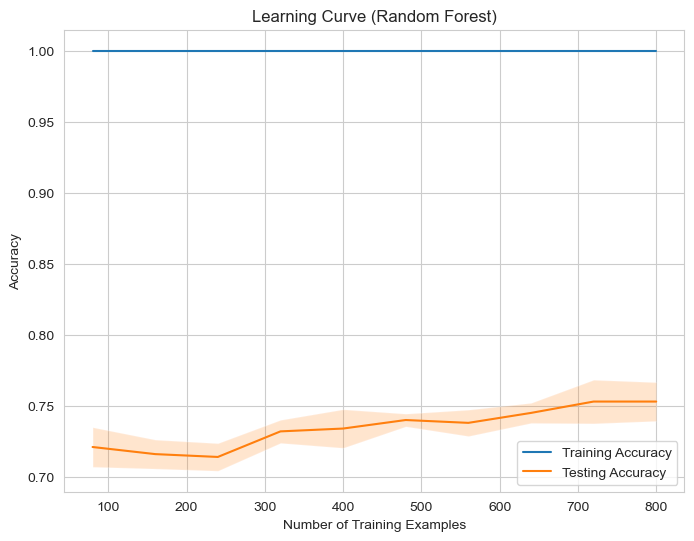

In [160]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf, X=X, y=y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Random Forest)')
plt.legend()
plt.show()

# 模型效能評估

In [156]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred_train = rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion = confusion_matrix(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
y_pred = rf.predict_proba(X_test)
cross_entropy = log_loss(y_test, y_pred)

print("Training accuracy : {:.2f}%".format(accuracy_train * 100))
print("Testing accuracy:", accuracy)
# print('F1 Score:', f1_score(y_test, y_pred))
print(f"Confusion matrix:\n{confusion}")
print('MSE:', mse)
print("Cross-Entropy: ", cross_entropy)
def neg_log_loss(y_true, y_prob):
    return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

Training accuracy : 100.00%
Testing accuracy: 0.75
Confusion matrix:
[[196  13]
 [ 62  29]]
MSE: 0.25
Cross-Entropy:  0.4973929854902744


# XGB

In [173]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [178]:

# Use XGBoost's scikit-learn interface
xgb_model = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=1,
    subsample=0.7,
    colsample_bytree=0.5,
    gamma=0.5,
    n_estimators=100,
    scale_pos_weight=1
)
xgb_model.fit(X_train, y_train)

# 预测测试集
y_pred = xgb_model.predict(X_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]


In [197]:
def objective(trial, X=df, y=y):
    """
    A function to train a model using different hyperparamerters combinations provided by Optuna.
    """
    X_train, X_valid, y_traing, y_valid = train_test_split(df, y, test_size=0.4)

    params = {
        "silent": 1,
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 500, 2500, 100),
        'eta': trial.suggest_float("eta", 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'gamma': trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
        'grow_policy': trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"]),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "nthread" : -1,
        'random_state' :7
    }
    # model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)

    reg = xgb.XGBRegressor(**params)
    reg.fit(X_train, y_traing,
            eval_set=[(X_valid, y_valid)], eval_metric='rmse',
            verbose=False)
    return mean_squared_error(y_valid, reg.predict(X_valid), squared=False)

In [ ]:
%%time
# Creating Optuna object and defining its parameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials = 30)

# Showing optimization results
print('Number of finished trials:', len(study.trials))
print('Best trial parameters:', study.best_trial.params)
print('Best score:', study.best_value)

In [199]:
best_params = study.best_trial.params
print(study.best_trial.params)
xgb_model = xgb.XGBRegressor(**best_params)

{'booster': 'dart', 'max_depth': 6, 'subsample': 0.5384612203924903, 'n_estimators': 1700, 'eta': 0.0034684255080873454, 'alpha': 0.0010208339011807622, 'lambda': 0.7932144402643571, 'gamma': 1.7428729442022727e-07, 'min_child_weight': 6.8088870127874355, 'grow_policy': 'depthwise', 'colsample_bytree': 0.7360270739399564}


In [201]:
xgb_model.fit(X_train, y_train)

# 预测测试集
y_pred = xgb_model.predict(X_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

# 获取特征的重要性

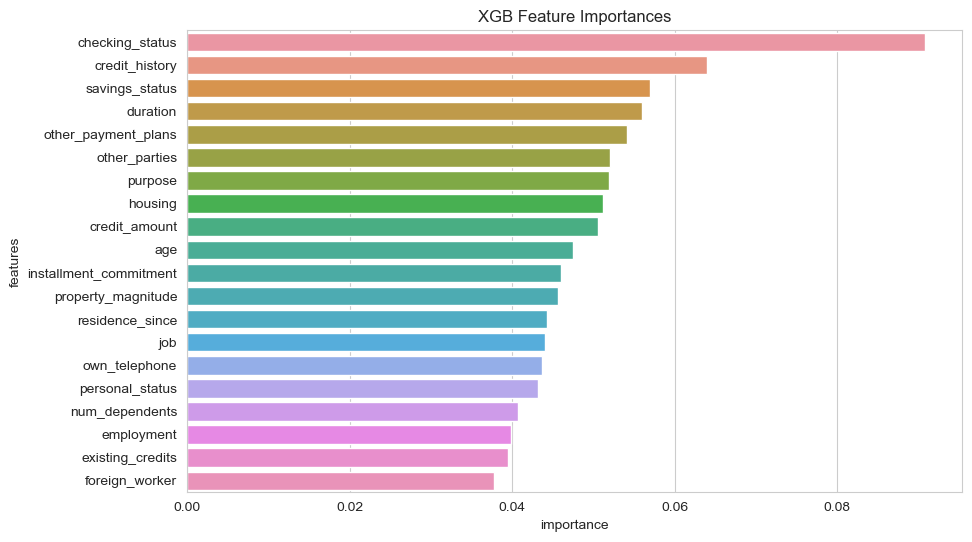

In [202]:
importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({'features': X_train.columns, 'importance': importance})

# 可视化特征的重要性
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='features', data=importance_df.sort_values(by="importance", ascending=False), orient='h')
plt.title('XGB Feature Importances')
plt.show()

# 绘制ROC曲线上的交叉熵

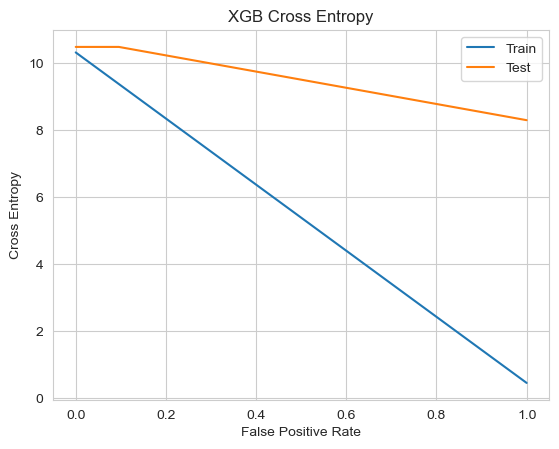

In [184]:
# 使用原生接口预测概率
train_probs = xgb_model.predict(X_train)
test_probs = xgb_model.predict(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs)

# 计算交叉熵
train_ce = [log_loss(y_train, (train_probs > threshold).astype(int)) for threshold in train_thresholds]
test_ce = [log_loss(y_test, (test_probs > threshold).astype(int)) for threshold in test_thresholds]

# 绘制图形
plt.plot(train_fpr, train_ce, label='Train')
plt.plot(test_fpr, test_ce, label='Test')
plt.title('XGB Cross Entropy')
plt.xlabel('False Positive Rate')
plt.ylabel('Cross Entropy')
plt.legend()
plt.show()


In [ ]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Testing accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# 定义XGBoost參數調整器
# xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='auc')
# params = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'n_estimators': [50, 100, 200],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.5],
#     'subsample': [0.5, 0.7, 0.9],
#     'colsample_bytree': [0.5, 0.7, 0.9],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [0, 0.1, 1],
#     'scale_pos_weight': [1, 3, 5]
# }
# # 执行网格搜索
# grid_search = GridSearchCV(estimator=xgb_clf, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# # 输出最佳超参数配置
# print("Best parameters:", grid_search.best_params_)
# # 预测测试集
# y_pred = grid_search.predict(X_test)
# # 计算准确率和混淆矩阵
# accuracy = accuracy_score(y_test, y_pred)
# confusion = confusion_matrix(y_test, y_pred)
# # 打印结果
# print(f"Accuracy: {accuracy}")
# print(f"Confusion matrix:\n{confusion}")

# GradientBoost

In [187]:
# 創建模型
dtc = GradientBoostingClassifier()

# 模型訓練
dtc.fit(X_train, y_train)

GradientBoostingClassifier()

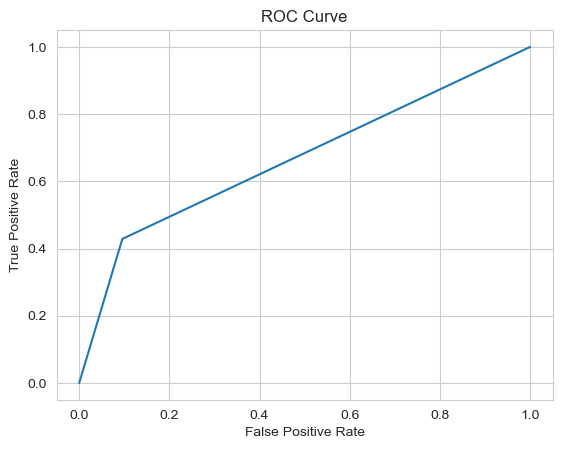

In [188]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [189]:

# 模型預測
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)
# 模型評估
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

准确率： 0.7766666666666666
Confusion Matrix:
 [[193  16]
 [ 51  40]]
ROC AUC Score: 0.6815027078184973
F1 Score: 0.54421768707483


准确率： 0.6833333333333333
Confusion Matrix:
 [[169  40]
 [ 55  36]]
ROC AUC Score: 0.6021084178978916
F1 Score: 0.43113772455089816


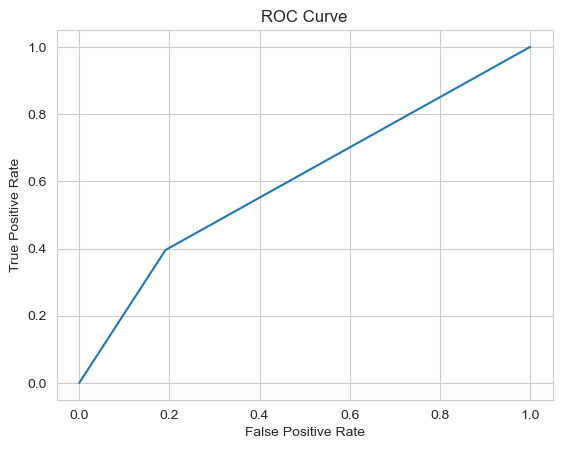

In [190]:
# 創建模型
dtc = DecisionTreeClassifier()

# 模型訓練
dtc.fit(X_train, y_train)

# 模型預測
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)
# 模型評估
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

from sklearn.metrics import classification_report,f1_score
print('F1 Score:', f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()